In [1]:
import os, sys
sys.path.append("../../common/")
from python_tools import *

python tools loaded.


In [2]:
cov_file = uproot.open("/Users/wketchum/Data/MicroBooNE/LEEFits/dllee_fd2/total_sys_pred.SBNcovar.root")
mc_file = uproot.open("/Users/wketchum/Data/MicroBooNE/LEEFits/dllee_fd2/sens_pred.SBNspec.root")
data_file = uproot.open("/Users/wketchum/Data/MicroBooNE/LEEFits/dllee_fd2/fakedata.SBNspec.root")

In [3]:
print(cov_file.keys())

print(mc_file.keys())

print(data_file.keys())

[b'full_covariance;1', b'frac_covariance;1', b'full_correlation;1', b'collapsed_covariance;1', b'collapsed_frac_covariance;1', b'collapsed_correlation;1']
[b'nu_uBooNE_1e1p_bnb;1', b'nu_uBooNE_1e1p_lee;1', b'nu_uBooNE_1mu1p_bnb;1']
[b'nu_uBooNE_1e1p_bnb;1', b'nu_uBooNE_1e1p_lee;1', b'nu_uBooNE_1mu1p_bnb;1']


In [4]:
nue_exp = mc_file["nu_uBooNE_1e1p_bnb"].numpy()[0]
numu_exp = mc_file["nu_uBooNE_1mu1p_bnb"].numpy()[0]
sig_exp = mc_file["nu_uBooNE_1e1p_lee"].numpy()[0]

print(numu_exp)
print(nue_exp)
print(sig_exp)

data_exp = np.append(np.copy(nue_exp),numu_exp)
print(data_exp)

[  0.97314376  37.38443988  80.53931249 142.17343352 145.04233853
 202.35919399 216.6416141  192.61179874 168.18682688 157.63053179
 151.76532236 134.11335586 118.11208506  97.62313092  70.78867279
  53.80732227  42.26102513  40.22557237  37.52254905]
[0.89014816 5.53521914 5.11951188 5.89301143 6.1502958  6.75387582
 4.32438007 4.787576   2.79661168 2.41397694]
[2.48856838e+00 6.83129402e+00 3.14813909e+00 1.73135001e+00
 1.00200603e+00 4.49844388e-01 1.94315588e-01 5.90744241e-02
 3.05822817e-03 7.30555333e-04]
[  0.89014816   5.53521914   5.11951188   5.89301143   6.1502958
   6.75387582   4.32438007   4.787576     2.79661168   2.41397694
   0.97314376  37.38443988  80.53931249 142.17343352 145.04233853
 202.35919399 216.6416141  192.61179874 168.18682688 157.63053179
 151.76532236 134.11335586 118.11208506  97.62313092  70.78867279
  53.80732227  42.26102513  40.22557237  37.52254905]


In [19]:
sig_exp = np.append(sig_exp,np.full_like(numu_exp,0.0))

In [5]:
m = cov_file["collapsed_covariance"]
m_cov_sys = np.copy(m._fElements.reshape(m._fNrows, m._fNcols))
m_cov = np.copy(m_cov_sys)

for i in range(0,len(data_exp)):
    m_cov[i,i] += data_exp[i]
    
m_cov_inv = np.linalg.inv(m_cov)

m_cov_nue = m_cov[:10,:10]
m_cov_numu = m_cov[10:,10:]
m_cov_em = m_cov[:10,10:]
m_cov_me = m_cov[10:,:10]

m_cov_nue_inv = np.linalg.inv(m_cov_nue)
m_cov_numu_inv = np.linalg.inv(m_cov_numu)

In [6]:
%matplotlib notebook

<IPython.core.display.Javascript object>


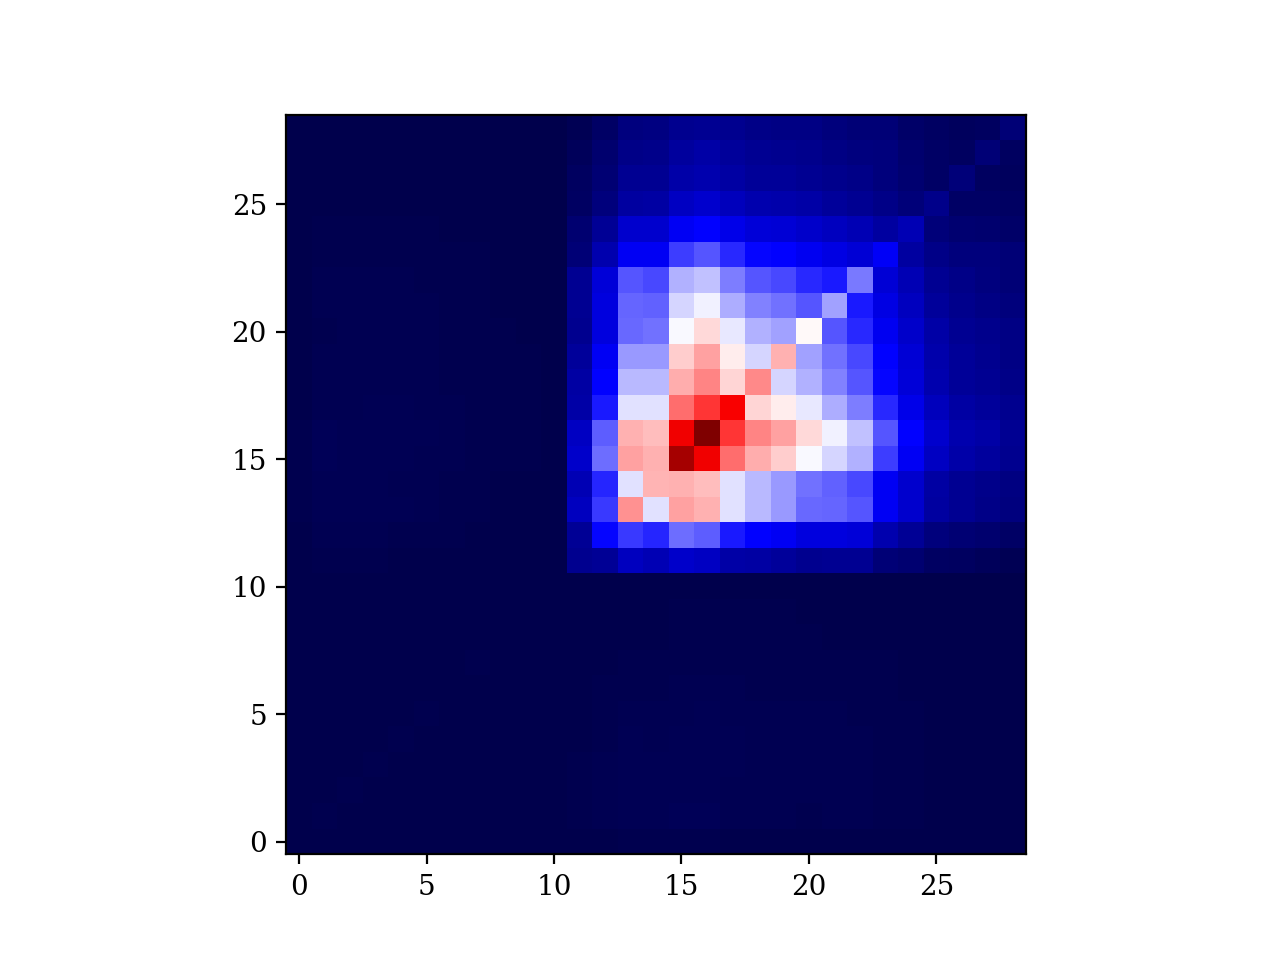

In [7]:
fig = plt.subplots()

plt.imshow(m_cov,origin={'lower','lower'})

<IPython.core.display.Javascript object>


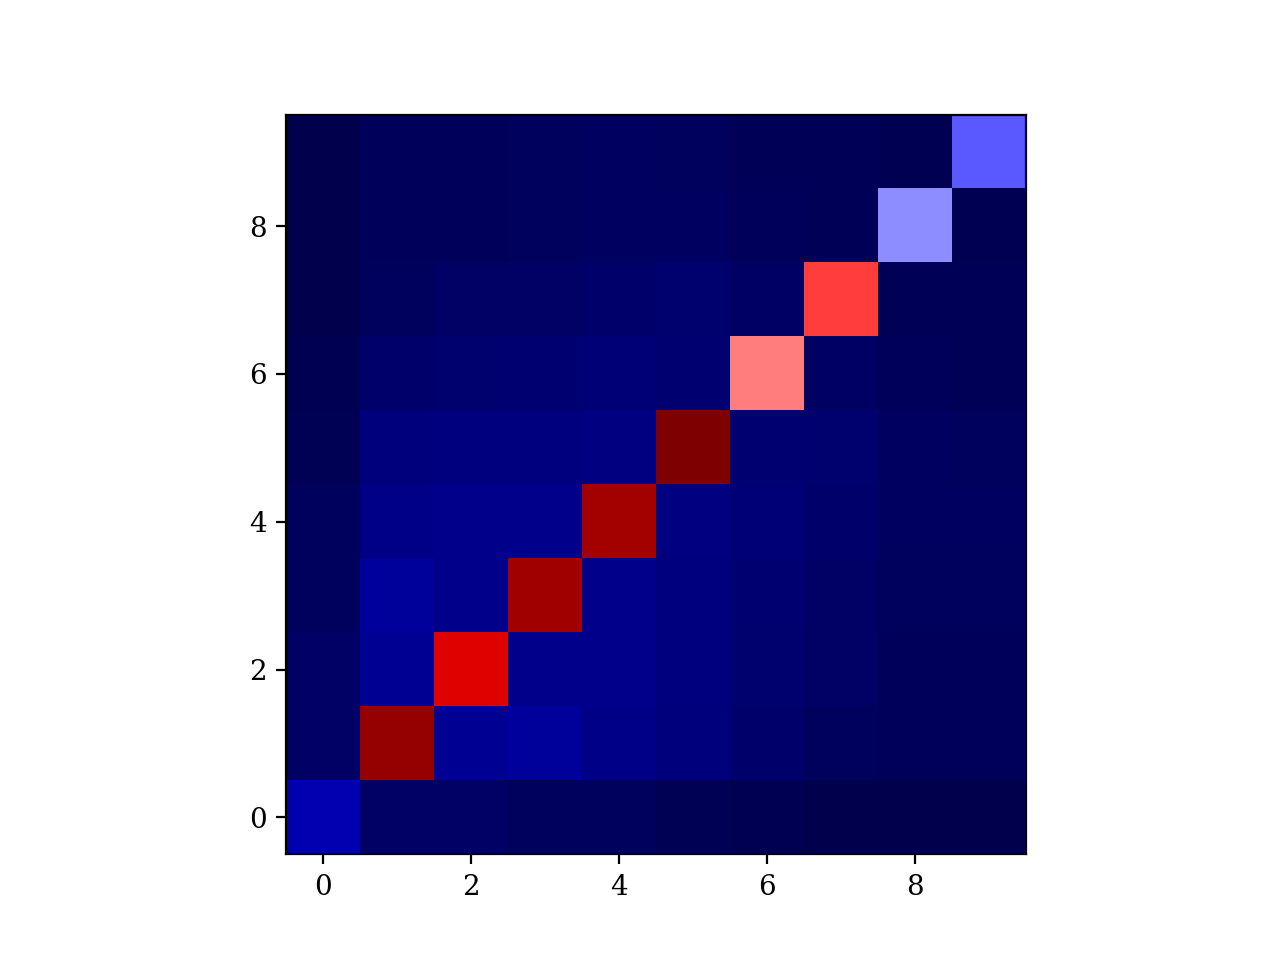

In [8]:
fig = plt.subplots()
fig = plt.imshow(m_cov_nue,origin={'lower','lower'})

<IPython.core.display.Javascript object>


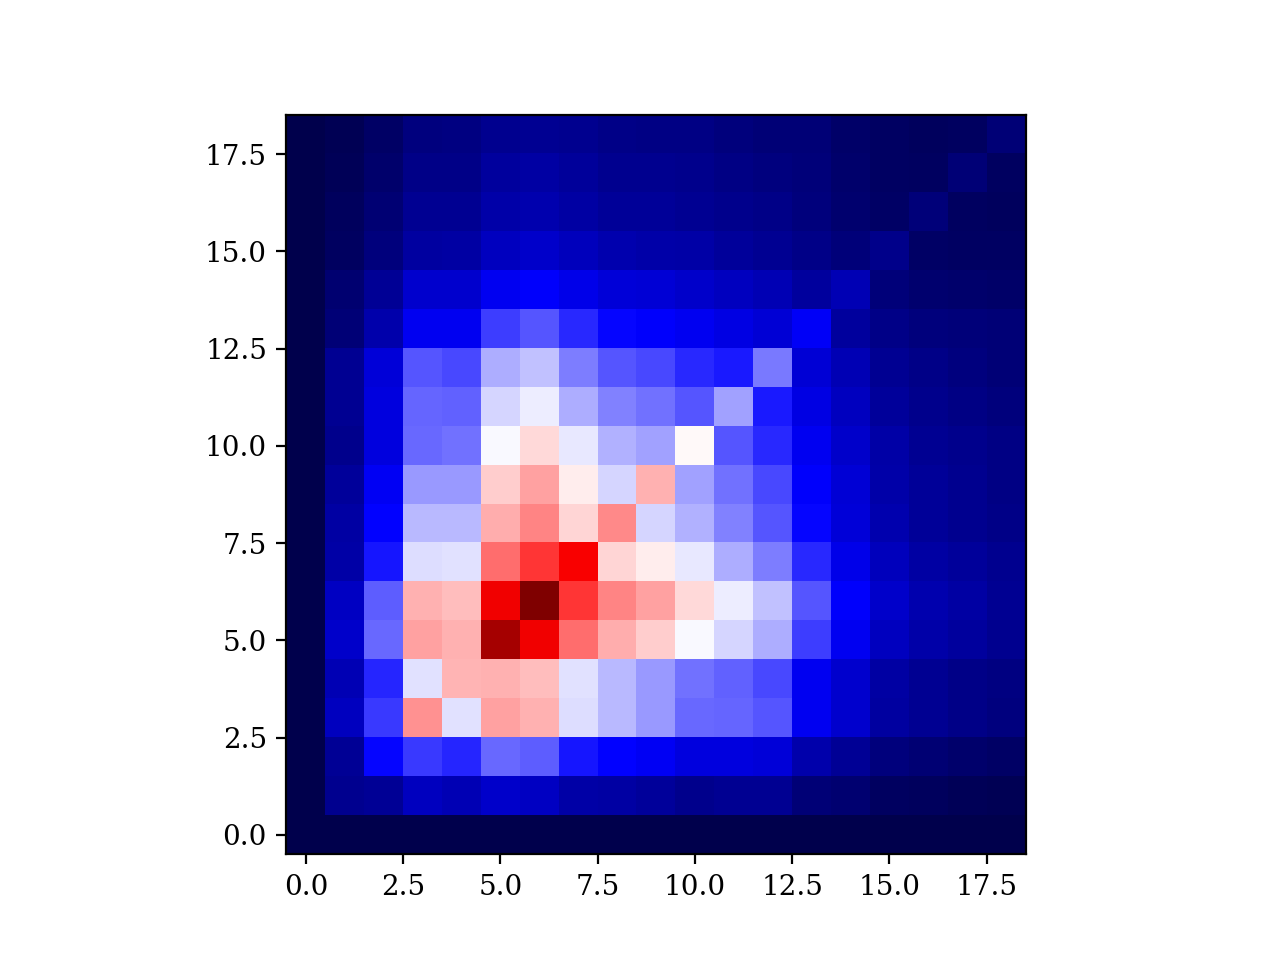

In [8]:
fig = plt.subplots()
fig = plt.imshow(m_cov_numu,origin={'lower','lower'})

In [9]:
nue_obs = data_file["nu_uBooNE_1e1p_bnb"].numpy()[0]
numu_obs = data_file["nu_uBooNE_1mu1p_bnb"].numpy()[0]

print(numu_obs)
print(nue_obs)

data_obs = np.append(np.copy(nue_obs),numu_obs)
print(data_obs)

[  5.  41.  85. 168. 168. 230. 250. 259. 184. 171. 181. 127. 111.  98.
  99.  70.  51.  41.  40.]
[ 4.  8.  5.  8.  9.  7. 10.  5.  0.  1.]
[  4.   8.   5.   8.   9.   7.  10.   5.   0.   1.   5.  41.  85. 168.
 168. 230. 250. 259. 184. 171. 181. 127. 111.  98.  99.  70.  51.  41.
  40.]


In [10]:
def chi2(diff,m_cov_inv):
    return np.matmul(np.transpose(diff),np.matmul(m_cov_inv,diff))
    
def cond_exp(diff1,exp2,m_cov_11_inv,m_cov_21):
    return exp2 + np.matmul(m_cov_21,np.matmul(m_cov_11_inv,diff1))

def cond_cov(m_cov_22,m_cov_11_inv,m_cov_12,m_cov_21):
    return m_cov_22 + np.matmul(m_cov_21,np.matmul(m_cov_11_inv,m_cov_12))

In [11]:
chi2(data_obs-data_exp,m_cov_inv)

63.920378288045704

In [13]:
nue_exp_cond = cond_exp(numu_obs-numu_exp,nue_exp,m_cov_numu_inv,m_cov_em)

In [14]:
nue_exp

array([0.89014816, 5.53521914, 5.11951188, 5.89301143, 6.1502958 ,
       6.75387582, 4.32438007, 4.787576  , 2.79661168, 2.41397694])

In [15]:
m_cov_cond = cond_cov(m_cov_nue,m_cov_numu_inv,m_cov_me,m_cov_em)
print(m_cov_cond)

[[1.19827614 0.54427995 0.53137656 0.38993451 0.36208945 0.21929492
  0.16897119 0.05905106 0.0729393  0.06909841]
 [0.54427995 7.69414371 1.2944732  1.32092207 1.0392613  0.80863706
  0.59198132 0.33145298 0.30970582 0.2893028 ]
 [0.53137656 1.2944732  6.52130303 1.13343267 1.07031858 0.855865
  0.62464094 0.43282992 0.30664685 0.30011125]
 [0.38993451 1.32092207 1.13343267 7.32819182 1.05914691 0.86175284
  0.666653   0.46387775 0.36032558 0.34116062]
 [0.36208945 1.0392613  1.07031858 1.05914691 7.25542647 0.9236535
  0.7069024  0.56045565 0.39340369 0.37015831]
 [0.21929492 0.80863706 0.855865   0.86175284 0.9236535  7.68903366
  0.6232714  0.5920134  0.36459948 0.33618491]
 [0.16897119 0.59198132 0.62464094 0.666653   0.7069024  0.6232714
  4.80528224 0.40746218 0.27427062 0.25884304]
 [0.05905106 0.33145298 0.43282992 0.46387775 0.56045565 0.5920134
  0.40746218 5.24894391 0.25170089 0.22937109]
 [0.0729393  0.30970582 0.30664685 0.36032558 0.39340369 0.36459948
  0.27427062 0.25

In [16]:
chi2(nue_obs-nue_exp_cond,np.linalg.inv(m_cov_cond))

20.527555471171077

In [17]:
chi2(numu_obs-numu_exp,np.linalg.inv(m_cov_numu))

40.48557351546065

In [18]:
m_cov_cond_sys = np.copy(m_cov_cond)
for i in range(len(nue_exp_cond)):
    m_cov_cond_sys[i,i] -= nue_exp_cond[i]
print(m_cov_cond_sys)

[[ 0.45988399  0.54427995  0.53137656  0.38993451  0.36208945  0.21929492
   0.16897119  0.05905106  0.0729393   0.06909841]
 [ 0.54427995  1.823386    1.2944732   1.32092207  1.0392613   0.80863706
   0.59198132  0.33145298  0.30970582  0.2893028 ]
 [ 0.53137656  1.2944732   1.27720754  1.13343267  1.07031858  0.855865
   0.62464094  0.43282992  0.30664685  0.30011125]
 [ 0.38993451  1.32092207  1.13343267  1.11309872  1.05914691  0.86175284
   0.666653    0.46387775  0.36032558  0.34116062]
 [ 0.36208945  1.0392613   1.07031858  1.05914691  0.80901755  0.9236535
   0.7069024   0.56045565  0.39340369  0.37015831]
 [ 0.21929492  0.80863706  0.855865    0.86175284  0.9236535   0.57920836
   0.6232714   0.5920134   0.36459948  0.33618491]
 [ 0.16897119  0.59198132  0.62464094  0.666653    0.7069024   0.6232714
   0.19493991  0.40746218  0.27427062  0.25884304]
 [ 0.05905106  0.33145298  0.43282992  0.46387775  0.56045565  0.5920134
   0.40746218  0.24075186  0.25170089  0.22937109]
 [ 0.

In [12]:
def get_pe(mean,m_cov_sys):
    return np.random.poisson(np.clip(np.random.multivariate_normal(mean, m_cov_sys),0,1e9))

In [15]:
for i in range(20):
    my_pe = get_pe(data_exp, m_cov_sys)
    print(my_pe)
    print(chi2(my_pe-data_exp,np.linalg.inv(m_cov)))

[  1   9   6   5  12   2   2   3   6   0   1  38  84 121 149 177 225 172
 172 141 155 159 105 101  92  46  45  48  42]
42.5175907784084
[  3  10   3  10   6   5   1   3   2   5   1  32  73 121 116 184 194 159
 163 162 129 126 111  89  49  47  49  24  34]
33.53958613918446
[  0  11   9   6   8   6   6   6   5   4   2  39  84 154 153 213 234 190
 188 189 158 155 151 112  79  59  59  41  62]
30.17139457959272
[  2   8   5   5   7   5   6   4   5   4   1  34  97 155 166 211 212 195
 172 139 145 108 118 103  69  51  44  40  34]
17.448478898178514
[  0   6   3   6   7   8   7   4   8   5   1  39  89 146 140 204 204 192
 157 148 156 146 138 122  65  49  39  37  34]
29.419012946657126
[  3   6   4   6  10   4   5   5   3   6   1  47  98 199 196 235 258 239
 202 220 180 169 146 122  96  55  49  59  64]
36.02600450537717
[  0   6   2   5   6   9   2   6   3   3   0  45  86 169 140 205 188 202
 177 156 159 132 138 106  75  51  38  51  33]
22.678752337711657
[  1   9   3   9  15   8   5   4   1   

In [21]:
sig_exp_cond = sig_exp * (nue_exp_cond)/nue_exp

In [22]:
def chi2_sig(x,data,sig,bkg,m_cov_inv):
    return chi2(data - (x*sig+bkg),m_cov_inv)

In [17]:
import scipy.optimize

In [23]:
for i in range(100):
    my_pe = get_pe(data_exp+1.0*sig_exp, m_cov_sys)
    print(my_pe)
    chi2_h0 = chi2(my_pe-data_exp,np.linalg.inv(m_cov))
    #print(chi2_sig([0.5],data=my_pe,sig=sig_exp_cond,bkg=nue_exp_cond,m_cov_cond_inv=np.linalg.inv(m_cov_cond)))
    x0 = [0.1]
    res = scipy.optimize.minimize(chi2_sig,x0,
                         args=(my_pe,
                               sig_exp,
                               data_exp,
                               np.linalg.inv(m_cov)),
                         bounds=[(0,100.)])
    chi2_h1 = chi2_sig(res.x[0],data=my_pe,sig=sig_exp,bkg=data_exp,m_cov_inv=np.linalg.inv(m_cov))
    print("chi2_h0=%f, chi2_h1=%f, diff=%f (best fit=%f)"%(chi2_h0,chi2_h1,chi2_h0-chi2_h1,res.x[0]))
    

[  1  10   5   4   8   4   1   2   0   1   0  20  54 105 110 138 157 127
 125 110 103  98  80  73  45  44  28  37  42]
chi2_h0=23.968849, chi2_h1=19.326400, diff=4.642449 (best fit=0.560848)
[  5   9   3   8   9  10   2   5   3   2   0  42  69 124 146 195 194 167
 162 139 125 126 107 108  61  50  43  40  41]
chi2_h0=36.049595, chi2_h1=23.589226, diff=12.460370 (best fit=0.918835)
[  3   9   7   4  11   6   4   4   4   2   1  15  58  91 119 182 180 177
 142 147 142 107  87 101  71  51  34  32  42]
chi2_h0=32.878568, chi2_h1=20.031497, diff=12.847071 (best fit=0.932983)
[  7   9  11   5  10   3   6   8   4   0   1  45 106 173 173 239 298 247
 198 171 178 164 122 132  97  75  52  34  41]
chi2_h0=75.368351, chi2_h1=50.111561, diff=25.256790 (best fit=1.308160)
[  5  16   3   8   4   4   4   6   1   3   1  29  78 146 161 220 247 209
 162 177 175 145 106  99  86  52  51  47  44]
chi2_h0=56.312209, chi2_h1=26.450697, diff=29.861512 (best fit=1.422420)
[  5  12   6  12   9   8   6   7   3   1 

In [25]:
df_pes = pd.DataFrame(columns=["mu_true","chi2_h0","chi2_h1","chi2_hb","chi2_diff","mu_fit"])

In [24]:
def run_pes(n_pes,mu_true,bkg_exp,sig_exp,m_cov_sys):
    
    m_cov = np.copy(m_cov_sys)
    for i in range(len(bkg_exp)):
        m_cov[i,i] += bkg_exp[i]
    m_cov_inv = np.linalg.inv(m_cov)

    tot_exp = bkg_exp+mu_true*sig_exp
    df_pes = pd.DataFrame(index=np.arange(0,n_pes),columns=["mu_true","chi2_h0","chi2_h1","chi2_hb","chi2_diff","mu_fit","pe_data"])
    
    for i in range(int(n_pes)):
        my_pe = get_pe(tot_exp,m_cov_sys)
        chi2_h0 = chi2(my_pe-bkg_exp,m_cov_inv)
        chi2_h1 = chi2(my_pe-tot_exp,m_cov_inv)
        x0 = [np.max([0.1,mu_true])]
        res = scipy.optimize.minimize(chi2_sig,x0,
                                      args=(my_pe,
                                            sig_exp,
                                            bkg_exp,
                                            m_cov_inv),
                                      bounds=[(0,100.)])
        chi2_hb = chi2_sig(res.x[0],data=my_pe,sig=sig_exp,bkg=bkg_exp,m_cov_inv=m_cov_inv)
        #print("chi2_h0=%f, chi2_h1=%f, diff=%f (best fit=%f)"%(chi2_h0,chi2_h1,chi2_h0-chi2_h1,res.x[0]))
        df_pes.loc[i] = [mu_true,chi2_h0,chi2_h1,chi2_hb,chi2_h1-chi2_hb,res.x[0],my_pe]
        
    return df_pes


In [25]:
run_pes(10,1.0,data_exp,sig_exp,m_cov_sys)

,mu_true,chi2_h0,chi2_h1,chi2_hb,chi2_diff,mu_fit,pe_data
0,1,25.6836,32.7152,24.6721,8.04306,0.261786,"[2, 9, 8, 7, 10, 7, 7, 4, 5, 3, 0, 56, 99, 158..."
1,1,46.4854,25.0419,24.285,0.756874,1.22646,"[5, 13, 11, 5, 6, 10, 7, 7, 3, 2, 1, 45, 97, 1..."
2,1,62.46,29.553,23.9743,5.57879,1.61481,"[5, 17, 13, 11, 11, 6, 7, 6, 3, 3, 0, 52, 101,..."
3,1,57.9861,37.1763,36.5561,0.62017,1.20499,"[5, 13, 14, 9, 6, 12, 4, 7, 5, 5, 0, 53, 127, ..."
4,1,74.2564,39.1819,32.1909,6.99098,1.68824,"[7, 13, 8, 5, 7, 9, 6, 3, 2, 1, 0, 30, 56, 119..."
5,1,44.5235,42.2872,39.6309,2.65634,0.575758,"[3, 10, 2, 8, 4, 4, 1, 7, 3, 2, 0, 32, 90, 157..."
6,1,51.02,52.4812,48.0247,4.45651,0.450498,"[1, 12, 4, 4, 6, 6, 2, 8, 4, 0, 2, 32, 68, 133..."
7,1,73.5289,39.0461,32.4565,6.58965,1.66819,"[6, 14, 15, 4, 10, 12, 7, 1, 2, 2, 0, 51, 85, ..."
8,1,38.1392,23.5582,23.5577,0.000536825,0.993969,"[3, 10, 11, 13, 5, 8, 7, 8, 3, 1, 0, 27, 68, 1..."
9,1,48.985,39.7672,39.2471,0.520093,0.812279,"[3, 11, 9, 7, 1, 7, 2, 5, 2, 2, 1, 41, 97, 128..."


In [26]:
true_vals = np.arange(0,3.5,0.1)
n_pes = 1e4

In [27]:
df_pes = pd.DataFrame()
for x in true_vals:
    print("\tRunning x=%f"%x)
    df_pes = df_pes.append(run_pes(n_pes,x,data_exp,sig_exp,m_cov_sys))

	Running x=0.000000
	Running x=0.100000
	Running x=0.200000
	Running x=0.300000
	Running x=0.400000
	Running x=0.500000
	Running x=0.600000
	Running x=0.700000
	Running x=0.800000
	Running x=0.900000
	Running x=1.000000
	Running x=1.100000
	Running x=1.200000
	Running x=1.300000
	Running x=1.400000
	Running x=1.500000
	Running x=1.600000
	Running x=1.700000
	Running x=1.800000
	Running x=1.900000
	Running x=2.000000
	Running x=2.100000
	Running x=2.200000
	Running x=2.300000
	Running x=2.400000
	Running x=2.500000
	Running x=2.600000
	Running x=2.700000
	Running x=2.800000
	Running x=2.900000
	Running x=3.000000
	Running x=3.100000
	Running x=3.200000
	Running x=3.300000
	Running x=3.400000


In [28]:
df_pes

,mu_true,chi2_h0,chi2_h1,chi2_hb,chi2_diff,mu_fit,pe_data
0.0,0,33.9254,33.9254,33.9254,0,0,"[0, 5, 7, 7, 8, 2, 11, 3, 1, 3, 1, 41, 103, 17..."
1.0,0,51.6413,51.6413,45.3362,6.30516,0.653612,"[4, 6, 13, 2, 4, 2, 2, 3, 1, 0, 0, 44, 96, 153..."
2.0,0,24.1609,24.1609,24.1609,0,0,"[1, 4, 5, 7, 4, 5, 6, 4, 3, 2, 3, 42, 100, 188..."
3.0,0,21.6701,21.6701,21.6701,0,0,"[1, 4, 5, 4, 8, 10, 5, 6, 2, 5, 0, 42, 93, 164..."
4.0,0,21.6158,21.6158,21.6158,0,0,"[1, 7, 5, 10, 9, 5, 5, 7, 5, 3, 0, 55, 127, 19..."
...,...,...,...,...,...,...,...
9995.0,3.4,202.097,35.2289,35.2083,0.0205631,3.36267,"[12, 24, 11, 10, 9, 10, 5, 6, 5, 5, 2, 30, 68,..."
9996.0,3.4,356.226,48.6468,21.1583,27.4884,4.76473,"[12, 37, 19, 15, 12, 9, 7, 3, 2, 0, 0, 22, 62,..."
9997.0,3.4,252.473,52.8227,51.5873,1.23538,3.68932,"[10, 34, 15, 21, 13, 5, 7, 8, 6, 5, 1, 59, 126..."
9998.0,3.4,225.682,36.3112,35.7956,0.515548,3.5869,"[7, 36, 17, 10, 9, 5, 4, 7, 1, 4, 2, 33, 60, 1..."


In [29]:
sigma1 = scipy.stats.norm(0,1).cdf(1)-scipy.stats.norm(0,1).cdf(-1)
sigma2 = scipy.stats.norm(0,1).cdf(2)-scipy.stats.norm(0,1).cdf(-2)
sigma3 = scipy.stats.norm(0,1).cdf(3)-scipy.stats.norm(0,1).cdf(-3)

In [30]:
critical_val_s1 = np.array([])
critical_val_s2 = np.array([])
critical_val_s3 = np.array([])

for x in true_vals:
    qstring=str("mu_true>(%f) and mu_true<(%f)"%(x-0.001,x+0.001))
    df_pes['mu_true'] = df_pes['mu_true'].astype(float)
    critical_vals = np.quantile(df_pes.query(qstring)["chi2_diff"],[sigma1,sigma2,sigma3])
    critical_val_s1 = np.append(critical_val_s1,critical_vals[0])
    critical_val_s2 = np.append(critical_val_s2,critical_vals[1])
    critical_val_s3 = np.append(critical_val_s3,critical_vals[2])
    #print("mu_true=%f: 1sig=%f, 2sig=%f, 3sig=%f"%(x,critical_vals[round(x,3)][0],critical_vals[round(x,3)][1],critical_vals[round(x,3)][2]))

In [31]:
for i in range(len(true_vals)):
    print("mu_true=%f: 1sig=%f, 2sig=%f, 3sig=%f"%(true_vals[i],
                                                  critical_val_s1[i],
                                                  critical_val_s2[i],
                                                  critical_val_s3[i]))

mu_true=0.000000: 1sig=0.170017, 2sig=3.301777, 3sig=11.287878
mu_true=0.100000: 1sig=0.792446, 2sig=3.972720, 3sig=12.999433
mu_true=0.200000: 1sig=1.162694, 2sig=4.266338, 3sig=13.157210
mu_true=0.300000: 1sig=1.406340, 2sig=5.008421, 3sig=16.279367
mu_true=0.400000: 1sig=1.565348, 2sig=5.898068, 3sig=17.195157
mu_true=0.500000: 1sig=1.710442, 2sig=6.610923, 3sig=18.004361
mu_true=0.600000: 1sig=1.886708, 2sig=7.560487, 3sig=19.669275
mu_true=0.700000: 1sig=2.008629, 2sig=8.209279, 3sig=20.644840
mu_true=0.800000: 1sig=2.165773, 2sig=8.795049, 3sig=22.430129
mu_true=0.900000: 1sig=2.266202, 2sig=9.124383, 3sig=22.683588
mu_true=1.000000: 1sig=2.484130, 2sig=10.117656, 3sig=25.403075
mu_true=1.100000: 1sig=2.688195, 2sig=10.848184, 3sig=26.539990
mu_true=1.200000: 1sig=2.726248, 2sig=11.350675, 3sig=27.547240
mu_true=1.300000: 1sig=2.885539, 2sig=11.588711, 3sig=28.781285
mu_true=1.400000: 1sig=2.976821, 2sig=11.686686, 3sig=30.628273
mu_true=1.500000: 1sig=3.285194, 2sig=13.022936, 3

In [54]:
def get_fc_interval(chi2_diff,true_vals,critical_vals):
    vals = np.where(chi2_diff<critical_vals,true_vals,np.nan)
    vals = vals[~np.isnan(vals)]
    return (np.amin(vals),np.amax(vals))

In [61]:
def chi2_diff(data_vals,x_vals,sig,bkg,m_cov_inv):
    diff_array = []
    for data in data_vals:
        x0 = [0.1]
        res = scipy.optimize.minimize(chi2_sig,x0,
                                      args=(data,
                                            sig,
                                            bkg,
                                            m_cov_inv),
                                            bounds=[(0,100.)])
        chi2_hb_obs = chi2_sig(res.x[0],data=data,sig=sig,bkg=bkg,m_cov_inv=m_cov_inv)
    
        chi2_diff = np.array([])
        for x in x_vals:
            chi2_h1_obs = chi2_sig(x,data=data,sig=sig,bkg=bkg,m_cov_inv=m_cov_inv)
            chi2_diff = np.append(chi2_diff,chi2_h1_obs-chi2_hb_obs)
        diff_array.append(chi2_diff)
    return diff_array


In [62]:
chi2_diff_obs = chi2_diff([data_obs],true_vals,sig_exp,data_exp,np.linalg.inv(m_cov))
print(chi2_diff_obs)
print(get_fc_interval(chi2_diff_obs,true_vals,critical_val_s1))
print(get_fc_interval(chi2_diff_obs,true_vals,critical_val_s2))
print(get_fc_interval(chi2_diff_obs,true_vals,critical_val_s3))

[array([7.50926462e+00, 5.55134665e+00, 3.88860824e+00, 2.52104940e+00,
       1.44867011e+00, 6.71470394e-01, 1.89450237e-01, 2.60964266e-03,
       1.10948610e-01, 5.14467141e-01, 1.21316523e+00, 2.20704289e+00,
       3.49610011e+00, 5.08033689e+00, 6.95975323e+00, 9.13434913e+00,
       1.16041246e+01, 1.43690796e+01, 1.74292142e+01, 2.07845284e+01,
       2.44350221e+01, 2.83806954e+01, 3.26215482e+01, 3.71575806e+01,
       4.19887926e+01, 4.71151841e+01, 5.25367552e+01, 5.82535059e+01,
       6.42654361e+01, 7.05725458e+01, 7.71748352e+01, 8.40723041e+01,
       9.12649526e+01, 9.87527806e+01, 1.06535788e+02])]
(0.4, 1.1)
(0.2, 1.6)
(0.0, 2.4000000000000004)


In [66]:
tmp = chi2_diff(df_pes.iloc[0:10]["pe_data"],true_vals,sig_exp,data_exp,np.linalg.inv(m_cov))

In [53]:
tmp = chi2_diff(df_pes.iloc[0]["pe_data"],true_vals,sig_exp,data_exp,np.linalg.inv(m_cov))
tmp<critical_val_s1

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [ ]:
print chi2_diff(nue_obs,)

res = scipy.optimize.minimize(chi2_sig,x0,
                                  args=(nue_obs,
                                        sig_exp,
                                        nue_exp_cond,
                                        np.linalg.inv(m_cov_cond)),
                                        bounds=[(0,100.)])

<IPython.core.display.Javascript object>


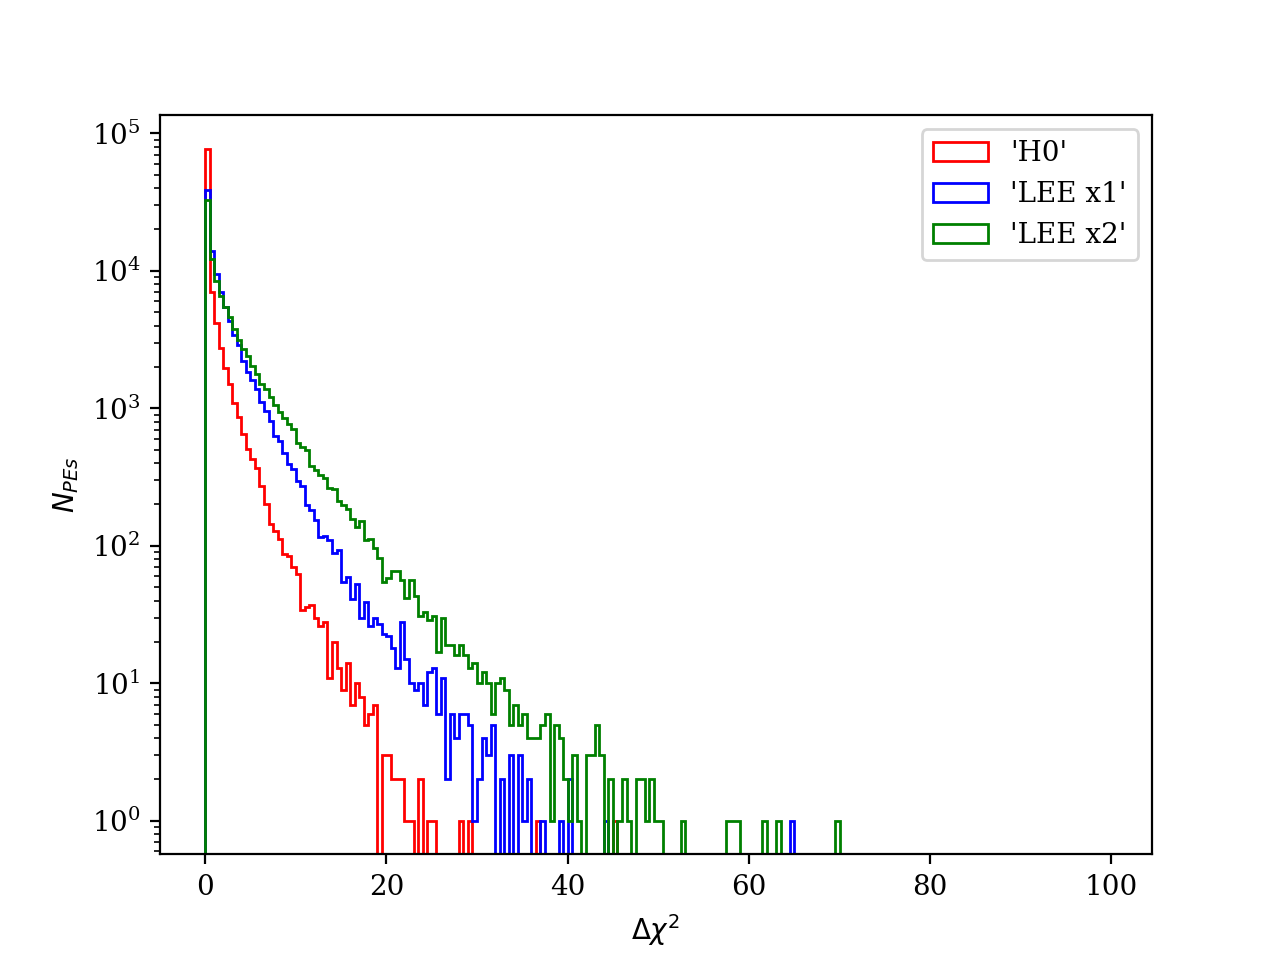

In [97]:
fig,ax = plt.subplots()

bins=np.arange(0,100,0.5)

ax.hist(df_pes.query("mu_true==0.0")["chi2_diff"],bins=bins,color='r',label="'H0'",histtype="step",log=True)
ax.hist(df_pes.query("mu_true==1.0")["chi2_diff"],bins=bins,color='b',label="'LEE x1'",histtype="step",log=True)
ax.hist(df_pes.query("mu_true==2.0")["chi2_diff"],bins=bins,color='g',label="'LEE x2'",histtype="step",log=True)

plt.legend()
ax.set_xlabel("$\Delta\chi^2$")
ax.set_ylabel("$N_{PEs}$")

plt.show()
plt.savefig("/Users/wketchum/Downloads/temp.pdf")

<IPython.core.display.Javascript object>


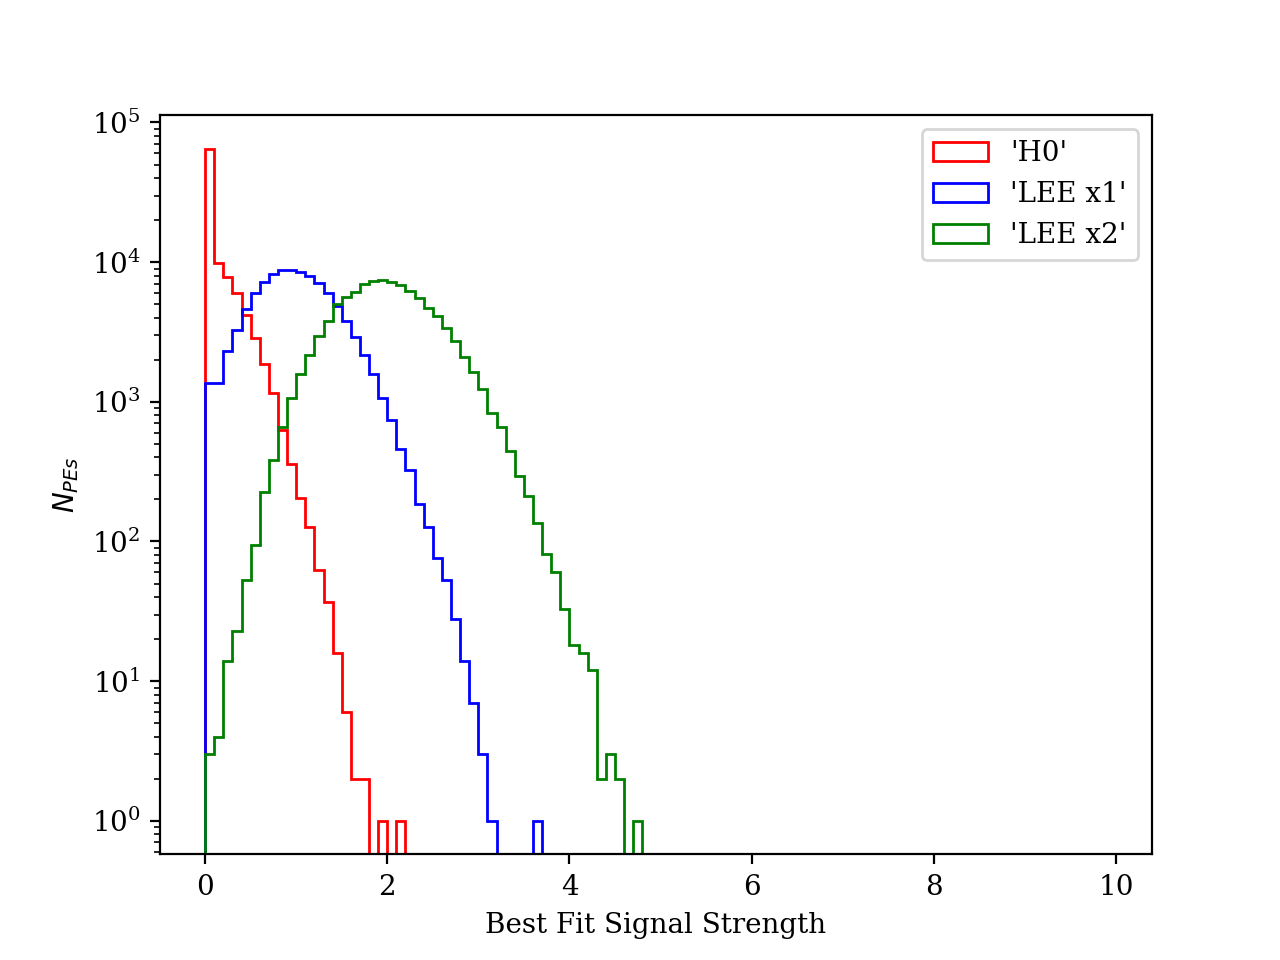

In [98]:
fig,ax = plt.subplots()

bins=np.arange(0,10,0.1)

ax.hist(df_pes.query("mu_true==0.0")["mu_fit"],bins=bins,color='r',label="'H0'",histtype="step",log=True)
ax.hist(df_pes.query("mu_true==1.0")["mu_fit"],bins=bins,color='b',label="'LEE x1'",histtype="step",log=True)
ax.hist(df_pes.query("mu_true==2.0")["mu_fit"],bins=bins,color='g',label="'LEE x2'",histtype="step",log=True)

plt.legend()
ax.set_xlabel("Best Fit Signal Strength")
ax.set_ylabel("$N_{PEs}$")

plt.show()
plt.savefig("/Users/wketchum/Downloads/temp.pdf")

In [36]:
df_pes.query("mu_true==0")["chi2_diff"]

0.0              0
1.0        3.61028
2.0              0
3.0              0
4.0       0.307943
            ...   
9995.0           0
9996.0     1.48242
9997.0           0
9998.0     4.73244
9999.0           0
Name: chi2_diff, Length: 10000, dtype: object

In [44]:
for x in np.arange(0,5.0,0.1):
    qstring=str("mu_true>(%f) and mu_true<(%f)"%(x-0.01,x+0.01))
    df_pes['mu_true'] = df_pes['mu_true'].astype(float)
    print("mu_true=%f"%x,np.quantile(df_pes.query(qstring)["chi2_diff"],[sigma1,sigma2,sigma3]))

mu_true=0.000000 [0.18678138206902214 3.4242425057277024 11.093265225228038]
mu_true=0.100000 [0.656043037043777 3.781878835329715 11.171287589973439]
mu_true=0.200000 [1.0219732377980582 3.8323440735987138 11.765246583806073]
mu_true=0.300000 [1.2724908750354609 4.310260893753168 14.61397577209777]
mu_true=0.400000 [1.3267385144927368 4.642431428445605 13.600376085853641]
mu_true=0.500000 [1.465857160459604 5.569006451023241 15.40198029763443]
mu_true=0.600000 [1.53428347904755 5.903857289405807 14.540634076402613]
mu_true=0.700000 [1.6602435180795225 6.601180117793705 17.161650759179707]
mu_true=0.800000 [1.75613543905031 6.864846295994467 18.349734227526845]
mu_true=0.900000 [1.7846891962936515 7.459657346221442 18.8322748145929]
mu_true=1.000000 [1.9267409626021512 7.480799231588793 18.33361004312689]
mu_true=1.100000 [1.967219932189273 7.963444540735192 21.010659960787]
mu_true=1.200000 [2.0684385652908617 8.406082570570536 21.483294266852543]
mu_true=1.300000 [2.19817515303941 8.

In [48]:
for x in np.arange(0,5.0,0.1):
    chi2_h0_obs = chi2(nue_obs-nue_exp_cond,np.linalg.inv(m_cov_cond))
    res = scipy.optimize.minimize(chi2_sig,x0,
                                  args=(nue_obs,
                                        sig_exp,
                                        nue_exp_cond,
                                        np.linalg.inv(m_cov_cond)),
                                        bounds=[(0,100.)])
    chi2_h1_obs = chi2_sig(x,data=nue_obs,sig=sig_exp,bkg=nue_exp_cond,m_cov_cond_inv=np.linalg.inv(m_cov_cond))
    chi2_hb_obs = chi2_sig(res.x,data=nue_obs,sig=sig_exp,bkg=nue_exp_cond,m_cov_cond_inv=np.linalg.inv(m_cov_cond))
    print("x=%f, chi2_h0_obs=%f, chi2_h1_obs=%f, chi2_hb_obs=%f, diff=%f (best fit=%f)"%(x,chi2_h0_obs,chi2_h1_obs,chi2_hb_obs,chi2_h1_obs-chi2_hb_obs,res.x[0]))

x=0.000000, chi2_h0_obs=20.527555, chi2_h1_obs=20.527555, chi2_hb_obs=15.841040, diff=4.686515 (best fit=0.683232)
x=0.100000, chi2_h0_obs=20.527555, chi2_h1_obs=19.256085, chi2_hb_obs=15.841040, diff=3.415045 (best fit=0.683232)
x=0.200000, chi2_h0_obs=20.527555, chi2_h1_obs=18.185405, chi2_hb_obs=15.841040, diff=2.344365 (best fit=0.683232)
x=0.300000, chi2_h0_obs=20.527555, chi2_h1_obs=17.315516, chi2_hb_obs=15.841040, diff=1.474475 (best fit=0.683232)
x=0.400000, chi2_h0_obs=20.527555, chi2_h1_obs=16.646417, chi2_hb_obs=15.841040, diff=0.805377 (best fit=0.683232)
x=0.500000, chi2_h0_obs=20.527555, chi2_h1_obs=16.178109, chi2_hb_obs=15.841040, diff=0.337068 (best fit=0.683232)
x=0.600000, chi2_h0_obs=20.527555, chi2_h1_obs=15.910591, chi2_hb_obs=15.841040, diff=0.069550 (best fit=0.683232)
x=0.700000, chi2_h0_obs=20.527555, chi2_h1_obs=15.843863, chi2_hb_obs=15.841040, diff=0.002823 (best fit=0.683232)
x=0.800000, chi2_h0_obs=20.527555, chi2_h1_obs=15.977926, chi2_hb_obs=15.841040,

In [38]:
hist_mu_00,bins = np.histogram(df_pes.query("mu_true==0")["mu_fit"].astype(float),bins=np.arange(0,10,0.1))

In [ ]:
hist_mu_00

In [ ]:
bins

In [ ]:
np.argmax(hist_mu_00[1:])+1

In [ ]:
def interval(df,level,prec=0.01):
    n_pes = len(df)
    hist_mu,bins = np.histogram(df,bins=np.arange(0,500,prec))
    init_max = np.argmax(hist_mu[1:])+1
    ilo = init_max
    ihi = init_max
    integral = hist_mu[init_max]
    
    while(integral < level*n_pes):
        if ilo==0:
            ihi += 1
            integral += hist_mu[ihi]
        elif(ihi==len(bins)-1):
            ilo -= 1
            integral += hist_mu[ilo]
        elif hist_mu[ilo-1]>hist_mu[ihi+1]:
            ilo -= 1
            integral += hist_mu[ilo]
        elif hist_mu[ilo-1]<=hist_mu[ihi+1]:
            ihi += 1
            integral += hist_mu[ihi]
    return bins[ilo], bins[ihi]+0.1, (integral/n_pes)

In [ ]:
interval(df_pes.query("mu_true==0.0")["mu_fit"],level=0.67)

In [ ]:
for x in np.arange(0,5.0,0.1):
    qstring=str("mu_true>(%f) and mu_true<(%f)"%(x-0.01,x+0.01))
    df_pes['mu_true'] = df_pes['mu_true'].astype(float)
    lo, hi, coverage = interval(df_pes.query(qstring)["mu_fit"],level=0.67)
    print("For true signal strength %f: %f < mu_fit < %f (coverage=%f)"%(x,lo,hi,coverage))

In [45]:
chi2_h0_obs = chi2(nue_obs-nue_exp_cond,np.linalg.inv(m_cov_cond))
res = scipy.optimize.minimize(chi2_sig,x0,
                              args=(nue_obs,
                                    sig_exp,
                                    nue_exp_cond,
                                    np.linalg.inv(m_cov_cond)),
                                    bounds=[(0,100.)])
chi2_h1_obs = chi2_sig(res.x,data=nue_obs,sig=sig_exp,bkg=nue_exp_cond,m_cov_cond_inv=np.linalg.inv(m_cov_cond))
print("chi2_h0_obs=%f, chi2_h1_obs=%f, diff=%f (best fit=%f)"%(chi2_h0_obs,chi2_h1_obs,chi2_h0_obs-chi2_h1_obs,res.x[0]))

chi2_h0_obs=20.527555, chi2_h1_obs=15.841040, diff=4.686515 (best fit=0.683232)


In [ ]:
len(df_pes.query("mu_true==0 and mu_fit>0.683232"))/len(df_pes.query("mu_true==0"))

In [ ]:
def confidence_bands(x_vals,df_pes,level,var="mu_fit",prec=0.01,verbose=False):
    x_lo = []
    x_hi = []
    for x in x_vals:
        qstring=str("mu_true>(%f) and mu_true<(%f)"%(x-0.001,x+0.001))
        df_pes['mu_true'] = df_pes['mu_true'].astype(float)
        lo, hi, coverage = interval(df_pes.query(qstring)[var],level,prec)
        x_lo.append(lo)
        x_hi.append(hi)
        if verbose:
            print("For true signal strength %f: %f < mu_fit < %f (coverage=%f)"%(x,lo,hi,coverage))
    return x_lo, x_hi

In [42]:
x_vals = np.arange(0,5.,0.1)
sigma1 = scipy.stats.norm(0,1).cdf(1)-scipy.stats.norm(0,1).cdf(-1)
sigma2 = scipy.stats.norm(0,1).cdf(2)-scipy.stats.norm(0,1).cdf(-2)
sigma3 = scipy.stats.norm(0,1).cdf(3)-scipy.stats.norm(0,1).cdf(-3)

x_lo1, x_hi1 = confidence_bands(x_vals,df_pes,level=sigma1,prec=0.05)
x_lo2, x_hi2 = confidence_bands(x_vals,df_pes,level=sigma2,prec=0.05)
x_lo3, x_hi3 = confidence_bands(x_vals,df_pes,level=sigma3,prec=0.05)

NameError: name 'confidence_bands' is not defined

In [ ]:
len(df_pes.query("mu_true==0 and chi2_diff>4.686515"))/len(df_pes.query("mu_true==0"))

In [ ]:
fig,ax = plt.subplots()

ax.plot(x_lo1,x_vals,color='b',label="$1\sigma$")
ax.plot(x_hi1,x_vals,color='b')

ax.plot(x_lo2,x_vals,color='b',linestyle="--",label="$2\sigma$")
ax.plot(x_hi2,x_vals,color='b',linestyle="--")

ax.plot(x_lo3,x_vals,color='b',linestyle="dotted",label="$3\sigma$")
ax.plot(x_hi3,x_vals,color='b',linestyle="dotted")

ax.vlines(x=res.x[0],ymin=x_vals[0],ymax=x_vals[-1],color='r',label="Observed, Fake Dataset2")

plt.legend(loc=4)
ax.set_xlabel("Fit Signal Strength")
ax.set_ylabel("True Signal Strength")

plt.grid(True)
plt.show()
plt.savefig("/Users/wketchum/Downloads/temp.pdf")

In [ ]:
x_vals = np.arange(0,5.,0.1)
sigma1 = scipy.stats.norm(0,1).cdf(1)-scipy.stats.norm(0,1).cdf(-1)
sigma2 = scipy.stats.norm(0,1).cdf(2)-scipy.stats.norm(0,1).cdf(-2)
sigma3 = scipy.stats.norm(0,1).cdf(3)-scipy.stats.norm(0,1).cdf(-3)

x_lo1, x_hi1 = confidence_bands(x_vals,df_pes,level=sigma1,var="chi2_diff",prec=1.)
x_lo2, x_hi2 = confidence_bands(x_vals,df_pes,level=sigma2,var="chi2_diff",prec=1.)
#x_lo3, x_hi3 = confidence_bands(x_vals,df_pes,level=sigma3,var="chi2_diff",prec=1.)

In [ ]:
fig,ax = plt.subplots()

ax.plot(x_lo1,x_vals,color='b',label="$1\sigma$")
ax.plot(x_hi1,x_vals,color='b')

ax.plot(x_lo2,x_vals,color='b',linestyle="--",label="$2\sigma$")
ax.plot(x_hi2,x_vals,color='b',linestyle="--")

#ax.plot(x_lo3,x_vals,color='b',linestyle="dotted",label="$3\sigma$")
#ax.plot(x_hi3,x_vals,color='b',linestyle="dotted")

ax.vlines(x=(chi2_h0_obs-chi2_h1_obs),ymin=x_vals[0],ymax=x_vals[-1],color='r',label="Observed, Fake Dataset2")

plt.legend(loc=4)
ax.set_xlabel("$\Delta\chi^2$")
ax.set_ylabel("True Signal Strength")

ax.set_xlim(left=0.,right=100.)
plt.grid(True)
plt.show()
plt.savefig("/Users/wketchum/Downloads/temp.pdf")